In [11]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

mpl.use('nbAgg')

In [12]:
path = './Data'
my_data = pd.read_csv(f'{path}/Project 1-Data.csv')
x = my_data['X'].values
y = my_data['Y'].values

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [13]:
def parta_scatter():
    import matplotlib.pyplot as plt
    %matplotlib notebook
    
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);

<IPython.core.display.Javascript object>


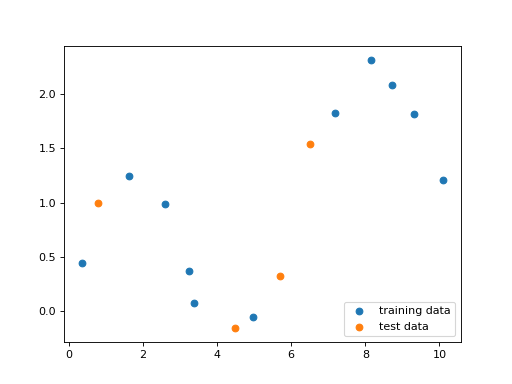

In [14]:
parta_scatter() 

In [15]:
def answer_b():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    fitted_values = np.zeros((4,100))
    
    for i, degree in enumerate([1,3,6,9]):
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X_train.reshape(11,1))
        clf = LinearRegression().fit(X_poly, y_train)
        y_poly = clf.predict(poly.fit_transform(np.linspace(0,10,100).reshape(100,1)));
        fitted_values[i,:] = y_poly
    return fitted_values
answer_b()

array([[ 2.53040196e-01,  2.69201548e-01,  2.85362900e-01,
         3.01524252e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008307e-01,  3.66169659e-01,  3.82331011e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976418e-01,  4.63137770e-01,  4.79299122e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105881e-01,  5.76267233e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235344e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203455e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0

In [16]:
answer_b().shape

(4, 100)

<IPython.core.display.Javascript object>


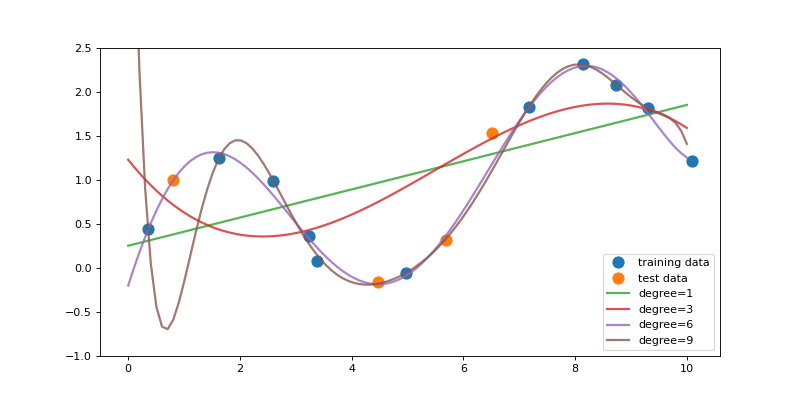

In [17]:
def plot_b(degree_predictions):
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
        plt.ylim(-1,2.5)
        plt.legend(loc=4)

plot_b(answer_b())

In [18]:
def answer_c():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics.regression import r2_score
    
    r2_train = np.zeros(10)
    r2_test = np.zeros(10)
    
    for i in range(10):
        poly = PolynomialFeatures(degree=i)
        
        # Train and score x_train
        X_poly = poly.fit_transform(X_train.reshape(11,1))
        linreg = LinearRegression().fit(X_poly, y_train)        
        r2_train[i] = linreg.score(X_poly, y_train);
        
        # Score x_test (do not train)
        X_test_poly = poly.fit_transform(X_test.reshape(4,1))
        r2_test[i] = linreg.score(X_test_poly, y_test)
        
    return (r2_train, r2_test)
answer_c()

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
        0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533106,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.63247952, -0.64525504]))

<IPython.core.display.Javascript object>


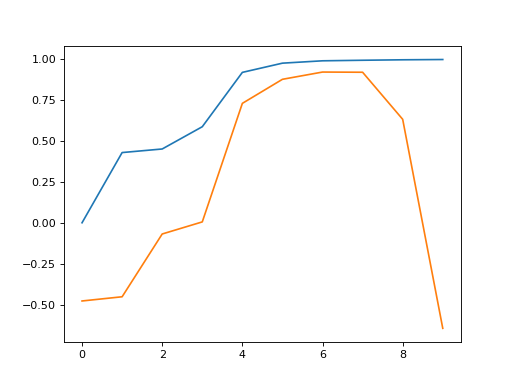

In [19]:
np.arange(0, 10)
r2_train, r2_test = answer_c()
degrees = np.arange(0, 10)
plt.figure()
plt.plot(range(10), r2_train, label='$R^2$ for Training Data')
plt.plot(range(10), r2_test, label='$R^2$ for Test Data')

**What degree level corresponds to a model that is underfitting?** 
[degree 1 and degree 3]


**What degree level corresponds to a model that is overfitting?** [degree 9]

**What choice of degree level would provide a model with good generalization performance on this dataset?** [degree 6]

In [20]:
def answer_d():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics.regression import r2_score

    # Create Polinomial Features
    poly = PolynomialFeatures(degree=12)
    
    # Reshape Polinomial Features
    X_train_poly = poly.fit_transform(X_train.reshape(11,1))
    X_test_poly = poly.fit_transform(X_test.reshape(4,1))
    
    # Linear Regression
    linreg = LinearRegression().fit(X_train_poly, y_train)
    lin_r2_test = linreg.score(X_test_poly, y_test)

    # Lasso Regression
    linlasso = Lasso(alpha=0.01, max_iter = 10000).fit(X_train_poly, y_train)
    las_r2_test = linlasso.score(X_test_poly, y_test)
    
    print('R2-score for the linear regression = {}'.format(lin_r2_test)), print('R2-score for the LASSO regression = {}'.format(las_r2_test))
answer_d()

R2-score for the linear regression = -4.311942662233327
R2-score for the LASSO regression = 0.8406625620786372


C:\Users\irrern\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3556421663006937, tolerance: 0.0006894982538311634
  model = cd_fast.enet_coordinate_descent(
